In [1]:
from Code.utils import data_loader, figures, audio_extraction
from matplotlib import pyplot as plt
import seaborn as sns
import random
import librosa

In [ ]:
from os import listdir
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataset = data_loader(path="./dataset/").getData()
dataset

,Path,Emotions
0,./dataset/1001_DFA_ANG_XX.wav,angry
1,./dataset/1001_DFA_DIS_XX.wav,disgust
2,./dataset/1001_DFA_FEA_XX.wav,fear
3,./dataset/1001_DFA_HAP_XX.wav,happy
4,./dataset/1001_DFA_NEU_XX.wav,neutral
...,...,...
7437,./dataset/1091_WSI_DIS_XX.wav,disgust
7438,./dataset/1091_WSI_FEA_XX.wav,fear
7439,./dataset/1091_WSI_HAP_XX.wav,happy
7440,./dataset/1091_WSI_NEU_XX.wav,neutral


In [6]:
dataset["Emotions"].value_counts()

disgust    1271
happy      1271
angry      1271
fear       1271
sad        1271
neutral    1087
Name: Emotions, dtype: int64

# Exploritory Data Analysis

<AxesSubplot: title={'center': 'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

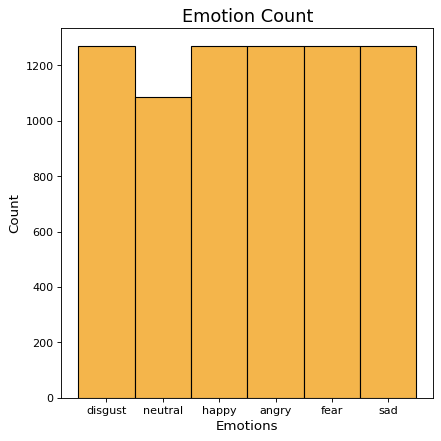

In [11]:
# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')

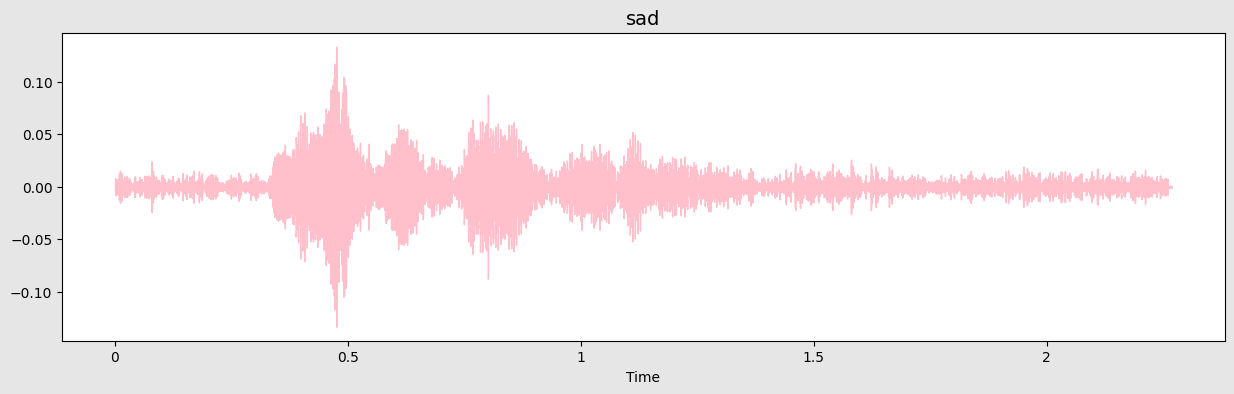

This is a recording of ./dataset/1046_TIE_SAD_XX.wav from 9 index of sad dataset


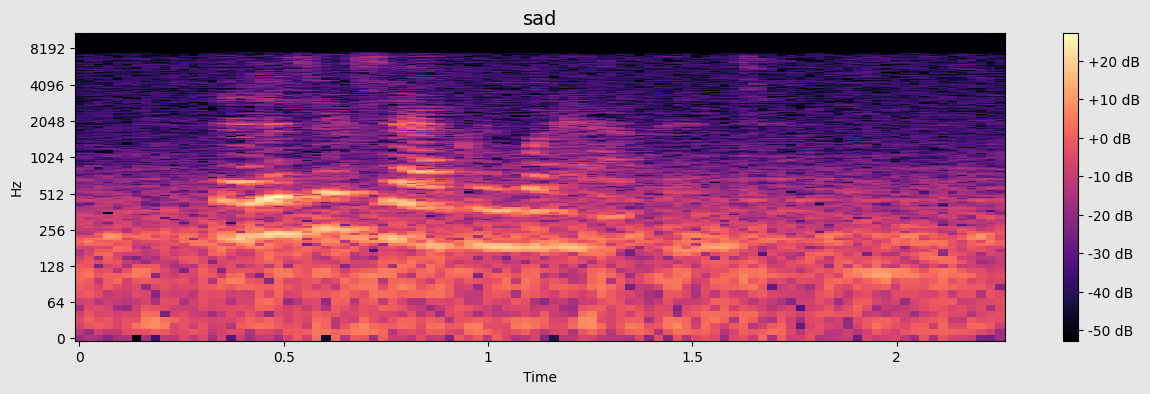

In [4]:
emotion = "sad"
path = ("./dataset/")
draw = figures(path, emotion)

draw.waveplot()
draw.spectogram('log')
draw.getAudio()

In [150]:

# load an individual sample audio file
# read the full 3 seconds of the file, cut off the first 0.5s of silence; native sample rate = 48k
# don't need to store the sample rate that librosa.load returns
file = "./dataset/1001_DFA_FEA_XX.wav"
music_array, sample_rate = librosa.load(file, sr=44100)

# Feature Extraction

In [7]:
file = dataset["Path"][:2]
print(file)
X_mfcc = file.apply(lambda x: audio_extraction.mfcc_formula(x))
X_mfcc

0    ./dataset/1001_DFA_ANG_XX.wav
1    ./dataset/1001_DFA_DIS_XX.wav
Name: Path, dtype: object


0    [-493.19052, 130.57959, -15.17191, 47.93188, -...
1    [-533.95325, 136.55078, -23.712204, 57.03613, ...
Name: Path, dtype: object

In [1]:
from Code.utils import data_loader, figures, audio_extraction
X_mfcc = audio_extraction("./dataset/").extract_audio()
X_mfcc

,0,1,2,3,4,5,6,7,8,9,10,11,12,Emotions
0,-493.190521,130.579590,-15.171910,47.931881,-2.633088,17.580477,-22.392756,-7.491928,-10.839611,-5.190917,-9.134110,-3.396870,2.244876,angry
1,-533.953247,136.550781,-23.712204,57.036129,2.207755,23.590717,-24.639025,3.642645,-11.085177,-6.580270,-4.861051,-5.963374,5.484548,disgust
2,-480.136627,111.516022,-8.318337,35.844154,5.748573,10.552864,-19.095610,-3.668406,-7.424833,-7.283167,-10.904288,-5.082917,0.080815,fear
3,-504.650818,122.550156,-15.159066,45.422527,7.672544,13.340709,-25.357574,-2.860527,-7.579400,-9.865721,-12.854387,-5.120391,0.348238,happy
4,-533.270813,128.219086,-6.071215,42.160110,10.969781,13.633672,-14.749569,-5.942591,-9.058737,-7.911500,-7.507226,-2.613515,0.558189,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,-617.730042,134.337433,10.402402,54.559120,-14.122120,40.434372,-16.255671,8.739514,-8.622474,2.713698,1.193010,-11.110655,6.110638,disgust
7438,-619.640259,128.407333,8.628220,64.150795,-14.054352,45.616741,-18.352726,8.310579,-5.797090,2.402461,-2.037600,-12.133834,5.760205,fear
7439,-549.675659,129.427277,-0.508095,57.266365,-16.252283,28.453440,-23.715984,5.575493,-11.502940,3.809773,-2.094521,-10.209229,8.525149,happy
7440,-575.136841,127.776810,13.419468,46.244183,-18.300213,30.528986,-12.969846,4.706892,-8.582385,4.726083,-0.939862,-9.744591,4.713840,neutral


# SVM Model

In [3]:
X_mfcc

,0,1,2,3,4,5,6,7,8,9,10,11,12,Emotions
0,-493.190521,130.579590,-15.171910,47.931881,-2.633088,17.580477,-22.392756,-7.491928,-10.839611,-5.190917,-9.134110,-3.396870,2.244876,angry
1,-533.953247,136.550781,-23.712204,57.036129,2.207755,23.590717,-24.639025,3.642645,-11.085177,-6.580270,-4.861051,-5.963374,5.484548,disgust
2,-480.136627,111.516022,-8.318337,35.844154,5.748573,10.552864,-19.095610,-3.668406,-7.424833,-7.283167,-10.904288,-5.082917,0.080815,fear
3,-504.650818,122.550156,-15.159066,45.422527,7.672544,13.340709,-25.357574,-2.860527,-7.579400,-9.865721,-12.854387,-5.120391,0.348238,happy
4,-533.270813,128.219086,-6.071215,42.160110,10.969781,13.633672,-14.749569,-5.942591,-9.058737,-7.911500,-7.507226,-2.613515,0.558189,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,-617.730042,134.337433,10.402402,54.559120,-14.122120,40.434372,-16.255671,8.739514,-8.622474,2.713698,1.193010,-11.110655,6.110638,disgust
7438,-619.640259,128.407333,8.628220,64.150795,-14.054352,45.616741,-18.352726,8.310579,-5.797090,2.402461,-2.037600,-12.133834,5.760205,fear
7439,-549.675659,129.427277,-0.508095,57.266365,-16.252283,28.453440,-23.715984,5.575493,-11.502940,3.809773,-2.094521,-10.209229,8.525149,happy
7440,-575.136841,127.776810,13.419468,46.244183,-18.300213,30.528986,-12.969846,4.706892,-8.582385,4.726083,-0.939862,-9.744591,4.713840,neutral


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit_transform(X_mfcc['Emotions'])
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


In [237]:
from sklearn.preprocessing import LabelEncoder()
label_encoder = LabelEncoder()
# 0:"angry", 1:"disgust", 2:"fear", 3:"happy", 4:"neutral", 5:"sad"
extracted_audio['Emotions'] = label_encoder.fit_transform(extracted_audio['Emotions'])

X = extracted_audio.drop(labels='Emotions', axis= 1)
Y = extracted_audio['Emotions']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [209]:
mlp_model = MLPClassifier(activation='relu',
                         solver='sgd',
                         hidden_layer_sizes=100,
                         alpha=0.839903176695813,
                         batch_size=150,
                         learning_rate='adaptive',
                         max_iter=100000)
# Fitting mlp model
mlp_model.fit(x_train,y_train)

MLPClassifier(alpha=0.839903176695813, batch_size=150, hidden_layer_sizes=100,
              learning_rate='adaptive', max_iter=100000, solver='sgd')

In [211]:
y_pred = mlp_model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("\nModel:{}    Accuracy: {:.2f}%".format(type(mlp_model).__name__ , accuracy*100))


Model:MLPClassifier    Accuracy: 49.23%


In [2]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
type(param_grid)
# grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
# grid.fit(x_train,y_train)

dict

In [1]:
print(grid.best_estimator_)

NameError: name 'grid' is not defined

In [212]:
SVM_model = svm.SVC(kernel='linear')
SVM_model.fit(x_train, y_train)

filename = 'SVM_Model.sav'
pickle.dump(SVM_model, open(filename, 'wb'))

SVC(kernel='linear')

In [213]:
y_pred=SVM_model.predict(x_test)

report = classification_report(y_test, y_pred)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

print("\nModel:{}    Accuracy: {:.2f}%".format(type(SVM_model).__name__ , accuracy*100))
print(report)


Model:SVC    Accuracy: 42.04%


In [ ]:
print("The Model's Prediction ")
print("<<<===========================================>>>")
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df